# Trend Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
# Load data from 'df_distilled_opinions_v3.pkl'
df = pd.read_pickle('df_distilled_opinions_v3.pkl')
df.head()

,Unnamed: 0,comment_id,link_id,subreddit,parent_id,redditor_id,created_at,body,score,edited,removed,word_count,sentiment,reason,opinion,community
0,19,kbo1j4c,1884kxx,singularity,t1_kbjmlvc,n1zijmj4,2023-12-02 11:24:08+00,Indeed. But this thing can do everything outpu...,"{""2024-04-24T04:32:25"":1}",False,NaN,110,Optimistic,Because the author highlights the potential fo...,AI opens new possibilities in art,AI and Technology Development
1,20,kbm1lqg,1884kxx,singularity,t1_kbl8ej1,n1zijmj4,2023-12-01 23:58:20+00,AI. We started with socials: an architect uses...,"{""2024-04-24T04:32:26"":1}",False,NaN,71,Optimistic,Because the author envisions a future where AI...,AI art creates new job opportunities,AI and Technology Development
2,26,kbnafa5,1884kxx,singularity,t1_kbjdkhk,taxmo7mf,2023-12-02 05:47:24+00,The tools for doing film entirely digitally ar...,"{""2024-04-24T04:32:31"":2}",False,NaN,27,Optimistic,Because the author is highlighting the advance...,AI tools enhance creative process,AI and Technology Development
3,110,inkzckq,x8zp1z,singularity,t3_x8zp1z,rvnme69p,2022-09-08 14:51:38+00,"As a filmmaker who works in post production, I...","{""2024-04-24T04:33:40"":119}",True,NaN,173,Optimistic,Because the author expresses fascination with ...,AI accelerates art production,AI Art and Creative Communities
4,116,inl0coy,x8zp1z,singularity,t3_x8zp1z,2s91u4uw,2022-09-08 14:59:31+00,I am curious about this too. When are we gonna...,"{""2024-04-24T04:33:46"":4}",False,NaN,134,Unclear,The author seems to have mixed feelings about ...,NaN,News and Daily life


- on sentiment

In [59]:
df_trend = df[['created_at', 'sentiment', 'opinion', 'community']]

df_trend['date'] = pd.to_datetime(df_trend['created_at']).dt.tz_localize(None)

# Filter comments with created_at time earlier than 01-04-2022
df_filtered = df_trend[df_trend['date'] < pd.to_datetime('2022-04-01')]

df_trend = df_trend.drop(df_filtered.index)
df_trend['date'] = df_trend['date'].dt.to_period('Q')

df_trend

C:\Users\86173\AppData\Local\Temp\ipykernel_21372\1492227946.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trend['date'] = pd.to_datetime(df_trend['created_at']).dt.tz_localize(None)


,created_at,sentiment,opinion,community,date
0,2023-12-02 11:24:08+00,Optimistic,AI opens new possibilities in art,AI and Technology Development,2023Q4
1,2023-12-01 23:58:20+00,Optimistic,AI art creates new job opportunities,AI and Technology Development,2023Q4
2,2023-12-02 05:47:24+00,Optimistic,AI tools enhance creative process,AI and Technology Development,2023Q4
3,2022-09-08 14:51:38+00,Optimistic,AI accelerates art production,AI Art and Creative Communities,2022Q3
4,2022-09-08 14:59:31+00,Unclear,NaN,News and Daily life,2022Q3
...,...,...,...,...,...
57111,2024-03-14 06:45:43+00,Unclear,NaN,News and Daily life,2024Q1
57118,2024-04-04 14:11:04+00,Unclear,NaN,News and Daily life,2024Q2
57120,2022-04-11 15:29:53+00,Unclear,NaN,AI and Technology Development,2022Q2
57122,2022-04-11 15:29:53+00,Unclear,NaN,AI and Technology Development,2022Q2


<Figure size 500x400 with 0 Axes>

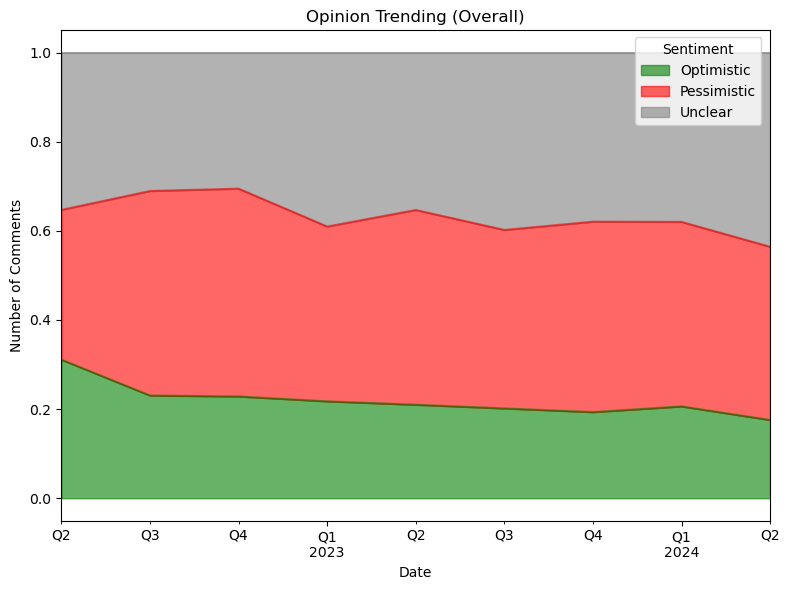

In [89]:
# Group by date and sentiment to count the number of occurrences of each sentiment per day
df_trend_grouped = df_trend.groupby(['date', 'sentiment']).size().unstack(fill_value=0)

# Normalize the sentiment counts for each date
df_trend_grouped_normalized = df_trend_grouped.div(df_trend_grouped.sum(axis=1), axis=0)

# Define the colormap with specific colors for positive, negative, and unclear sentiments
sentiment_colors = {
    'Optimistic': 'green',
    'Pessimistic': 'red',
    'Unclear': 'grey',
}

# Plotting the sentiment trends with specified colors
plt.figure(figsize=(5, 4))
colors = [sentiment_colors.get(x, 'blue') for x in df_trend_grouped_normalized.columns]
df_trend_grouped_normalized.plot(kind='area', stacked=True, color=colors, alpha=0.6, figsize=(8,6))
plt.title('Opinion Trending (Overall)')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.legend(title='Sentiment', bbox_to_anchor=(0.8, 1), loc='upper left')
plt.tight_layout()

- on opinions

In [61]:
# Drop rows where opinion is NaN or 'other', 'others'
df_trend_cleaned = df_trend.dropna(subset=['opinion'])
df_trend_cleaned = df_trend_cleaned[~df_trend_cleaned['opinion'].str.lower().isin(['other', 'others'])]

# Group by date and opinion to count the number of occurrences of each opinion per month
df_opinion_grouped = df_trend_cleaned.groupby(['date', 'opinion']).size().unstack(fill_value=0)

# Normalize the opinion counts for each date
df_opinion_grouped_normalized = df_opinion_grouped.div(df_opinion_grouped.sum(axis=1), axis=0)


optimistic

In [65]:
# Group by date and opinion to count the number of occurrences of each opinion per month
df_optimistic_grouped = df_trend_cleaned[df_trend_cleaned['sentiment']=='Optimistic'].groupby(['date', 'opinion']).size().unstack(fill_value=0)

# Normalize the opinion counts for each date
df_optimistic_grouped_normalized = df_optimistic_grouped.div(df_optimistic_grouped.sum(axis=1), axis=0)

<Figure size 1400x700 with 0 Axes>

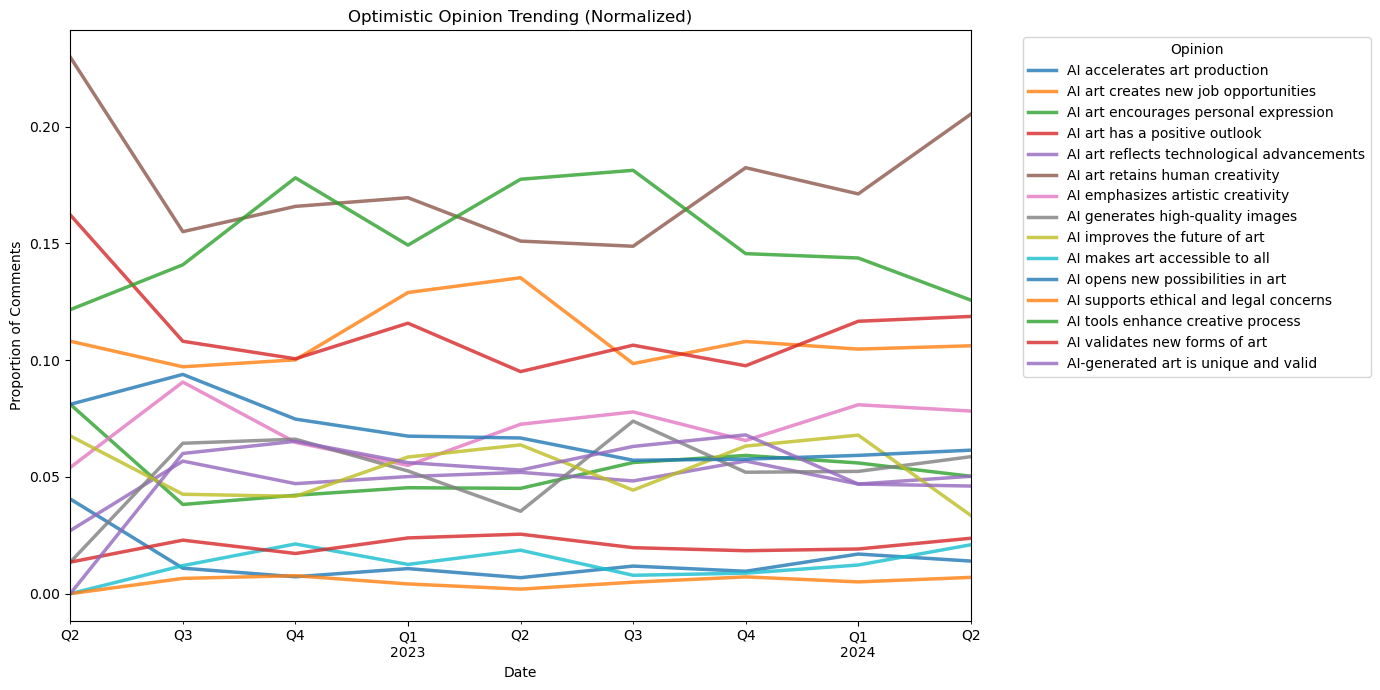

In [67]:
# Plotting the opinion trends with specified colors
plt.figure(figsize=(14, 7))
df_optimistic_grouped_normalized.plot(kind='line', alpha=0.8, figsize=(14, 7), linewidth=2.5)
plt.title('Optimistic Opinion Trending (Normalized)')
plt.xlabel('Date')
plt.ylabel('Proportion of Comments')
plt.legend(title='Opinion', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

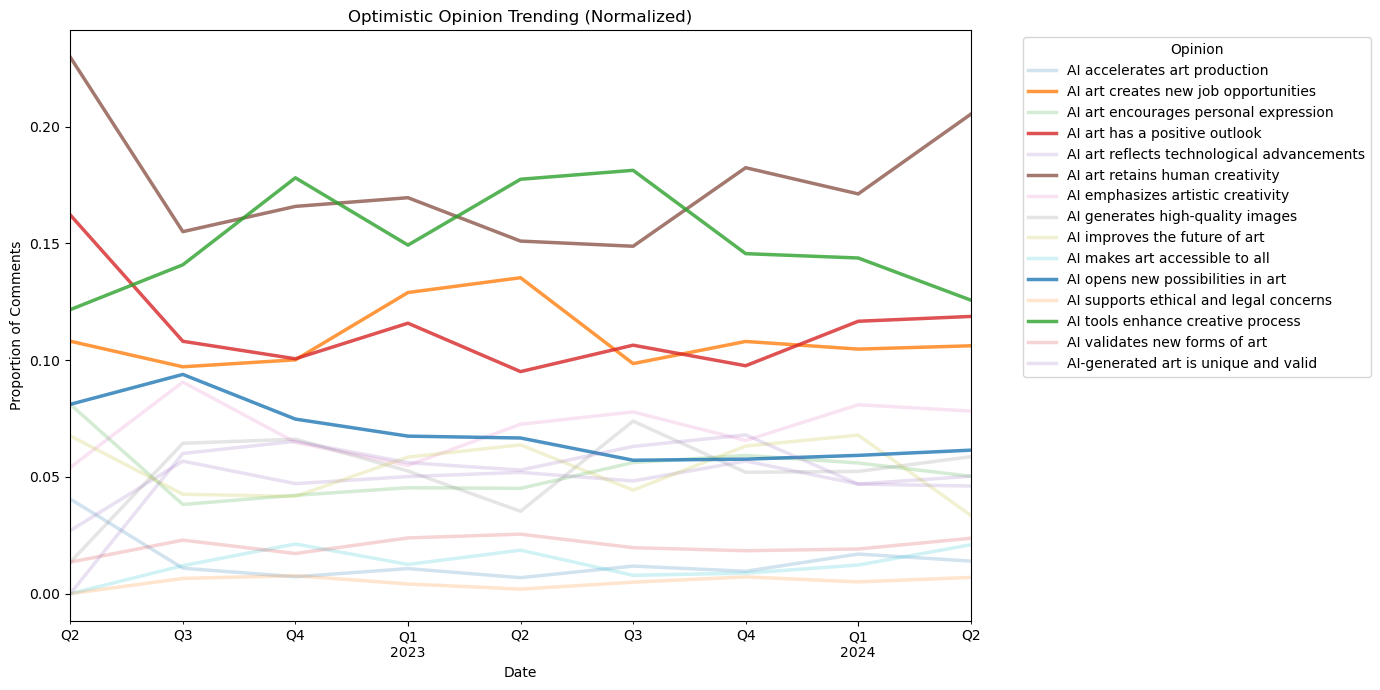

In [68]:
# highlight

# Plotting with specified conditions
highlight_opinions = [
    'AI art retains human creativity',
    'AI tools enhance creative process',
    'AI art creates new job opportunities',
    'AI art has a positive outlook',
    'AI opens new possibilities in art'
]

plt.figure(figsize=(14, 7))
for column in df_optimistic_grouped_normalized.columns:
    if column in highlight_opinions:
        df_optimistic_grouped_normalized[column].plot(kind='line', alpha=0.8, linewidth=2.5)
    else:
        df_optimistic_grouped_normalized[column].plot(kind='line', alpha=0.2, linewidth=2.5)

plt.title('Optimistic Opinion Trending (Normalized)')
plt.xlabel('Date')
plt.ylabel('Proportion of Comments')
plt.legend(title='Opinion', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

pessimistic

In [69]:
# Group by date and opinion to count the number of occurrences of each opinion per month
df_pessimistic_grouped = df_trend_cleaned[df_trend_cleaned['sentiment']=='Pessimistic'].groupby(['date', 'opinion']).size().unstack(fill_value=0)

# Normalize the opinion counts for each date
df_pessimistic_grouped_normalized = df_pessimistic_grouped.div(df_pessimistic_grouped.sum(axis=1), axis=0)

<Figure size 1400x700 with 0 Axes>

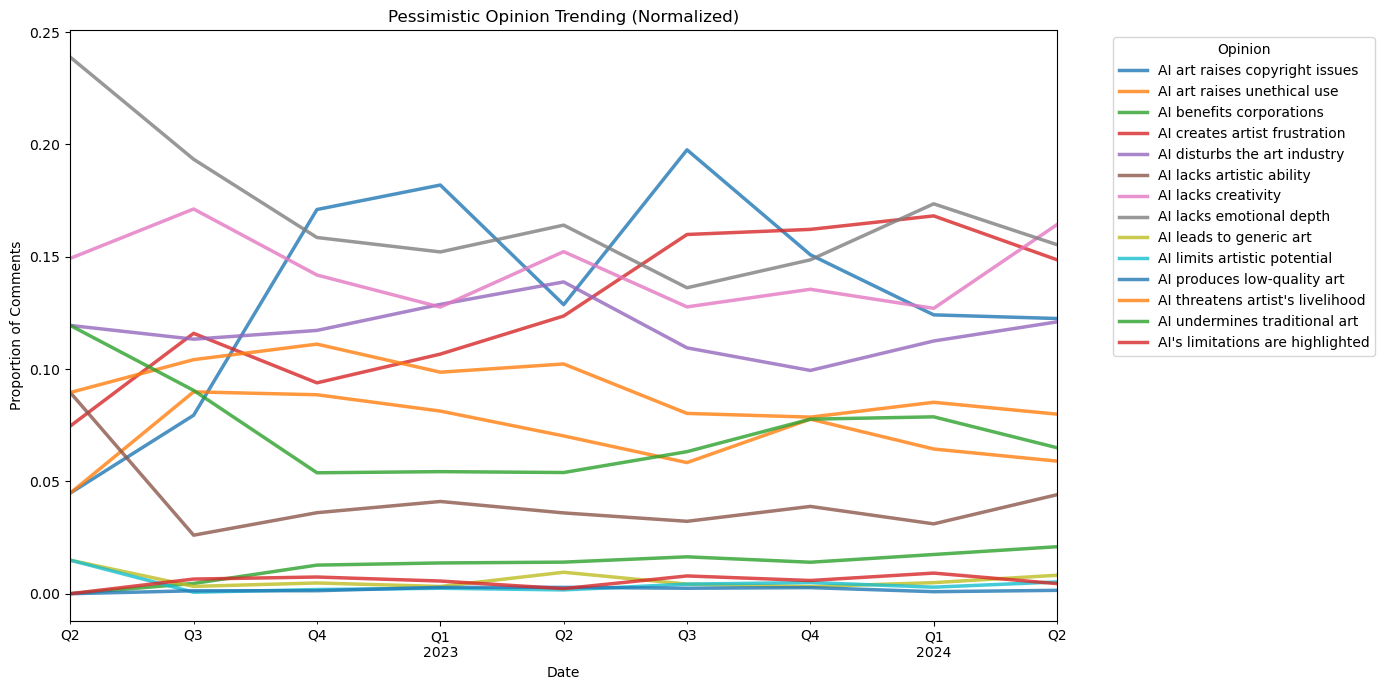

In [71]:
# Plotting the opinion trends with specified colors
plt.figure(figsize=(14, 7))
df_pessimistic_grouped_normalized.plot(kind='line', alpha=0.8, figsize=(14, 7), linewidth=2.5)
plt.title('Pessimistic Opinion Trending (Normalized)')
plt.xlabel('Date')
plt.ylabel('Proportion of Comments')
plt.legend(title='Opinion', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

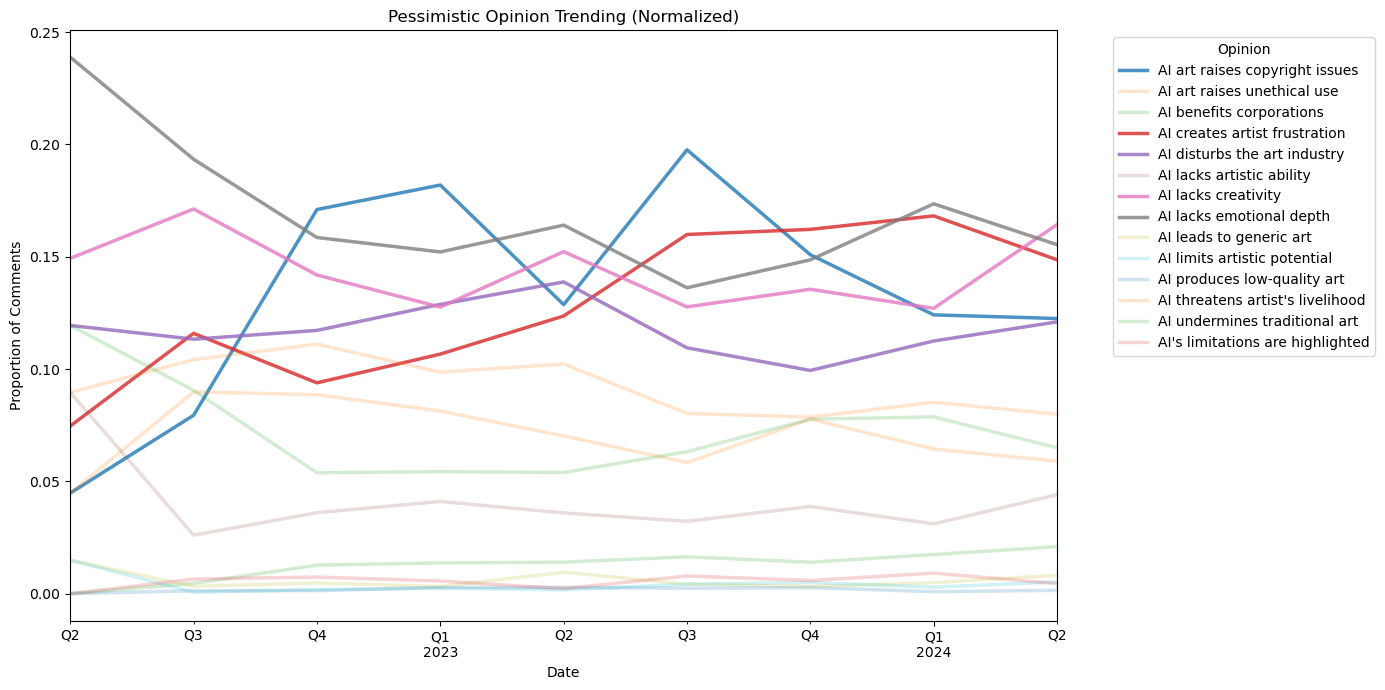

In [72]:
# highlight
highlight_pessimistic_opinions = [
    'AI lacks emotional depth',
    'AI creates artist frustration',
    'AI lacks creativity',
    'AI art raises copyright issues',
    'AI disturbs the art industry'
]

plt.figure(figsize=(14, 7))
for column in df_pessimistic_grouped_normalized.columns:
    if column in highlight_pessimistic_opinions:
        df_pessimistic_grouped_normalized[column].plot(kind='line', alpha=0.8, linewidth=2.5)
    else:
        df_pessimistic_grouped_normalized[column].plot(kind='line', alpha=0.2, linewidth=2.5)

plt.title('Pessimistic Opinion Trending (Normalized)')
plt.xlabel('Date')
plt.ylabel('Proportion of Comments')
plt.legend(title='Opinion', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

- by communities

In [73]:
# Drop nan in the 'community' column
df_trend_community = df_trend_cleaned.dropna(subset=['community'])

# values in the 'community' column
df_trend_community['community'].value_counts()

community
News and Daily life                7174
AI and Technology Development      5285
AI Art and Creative Communities    4928
AI in Gaming                       2033
Name: count, dtype: int64

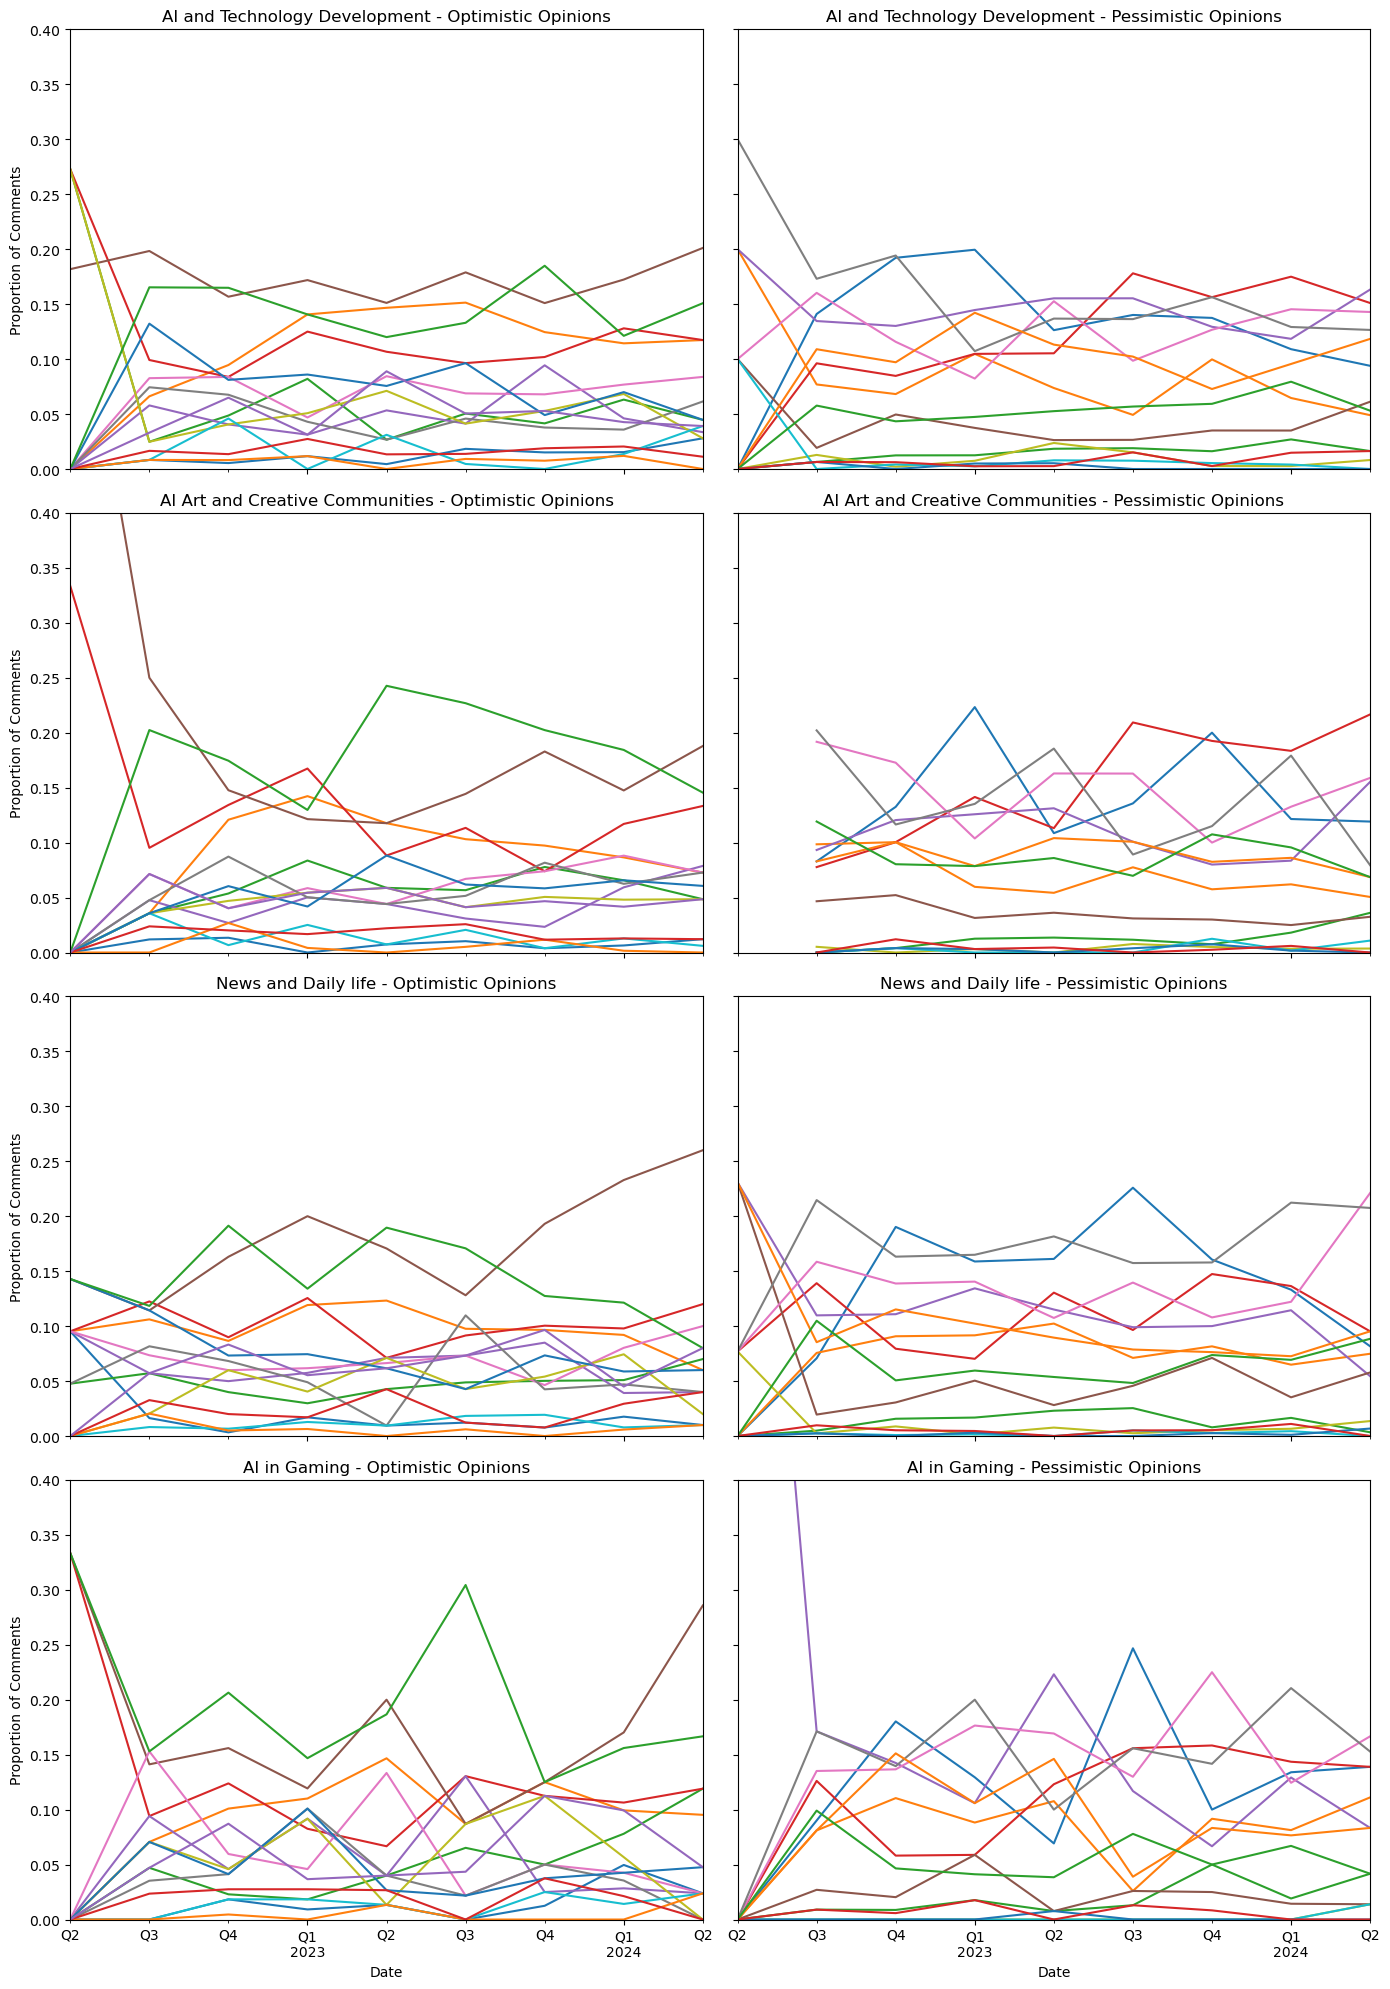

In [74]:
# Get unique communities
communities = df_trend_community['community'].unique()

# Prepare figures for each community
fig, axes = plt.subplots(len(communities), 2, figsize=(14, 5 * len(communities)), sharex=True, sharey=True)

for i, community in enumerate(communities):
    # Filter by community
    df_community = df_trend_community[df_trend_community['community'] == community]
    
    # Optimistic opinions
    df_optimistic_grouped = df_community[df_community['sentiment'] == 'Optimistic'].groupby(['date', 'opinion']).size().unstack(fill_value=0)
    df_optimistic_grouped_normalized = df_optimistic_grouped.div(df_optimistic_grouped.sum(axis=1), axis=0).fillna(0)
    
    # Pessimistic opinions
    df_pessimistic_grouped = df_community[df_community['sentiment'] == 'Pessimistic'].groupby(['date', 'opinion']).size().unstack(fill_value=0)
    df_pessimistic_grouped_normalized = df_pessimistic_grouped.div(df_pessimistic_grouped.sum(axis=1), axis=0).fillna(0)
    
    # Plotting for optimistic
    ax1 = axes[i, 0]
    if not df_optimistic_grouped_normalized.empty:
        df_optimistic_grouped_normalized.plot(kind='line', ax=ax1, legend=False)
    ax1.set_title(f'{community} - Optimistic Opinions')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Proportion of Comments')
    ax1.set_ylim(0, 0.4)
    
    # Plotting for pessimistic
    ax2 = axes[i, 1]
    if not df_pessimistic_grouped_normalized.empty:
        df_pessimistic_grouped_normalized.plot(kind='line', ax=ax2, legend=False)
    ax2.set_title(f'{community} - Pessimistic Opinions')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Proportion of Comments')
    ax2.set_ylim(0, 0.4)

plt.tight_layout()
plt.show()


-----

In [76]:
df_trend_grouped_community = df_trend.dropna(subset=['community']).groupby(['community', 'date', 'sentiment']).size().unstack(fill_value=0)

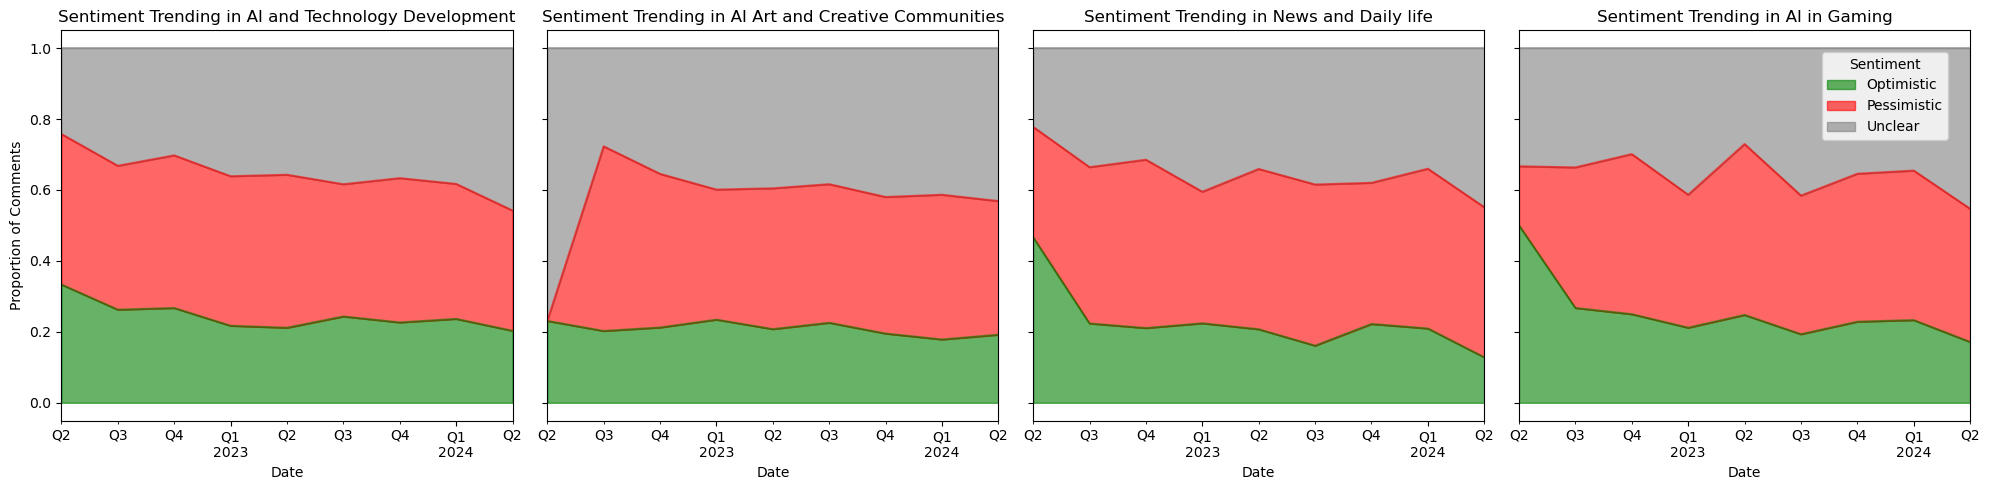

In [77]:
# Define the subplots layout
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5), sharey=True)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot sentiment trends for each community in a single figure
for ax, community in zip(axes, communities):
    community_data = df_trend_grouped_community.loc[community]
    community_data_normalized = community_data.div(community_data.sum(axis=1), axis=0)
    
    colors = [sentiment_colors.get(x, 'blue') for x in community_data_normalized.columns]
    community_data_normalized.plot(kind='area', stacked=True, color=colors, alpha=0.6, ax=ax)
    ax.set_title(f'Sentiment Trending in {community}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Proportion of Comments')
    ax.legend().remove()

# Adjust layout and add a common legend
fig.tight_layout()
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Sentiment', bbox_to_anchor=(0.98, 0.9))
